<a href="https://colab.research.google.com/github/97hackbrian/Seeker_ComputerVision/blob/main/notebooks/data_acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1057]:
import cv2
import matplotlib.pyplot as plt

(720, 1280, 3)


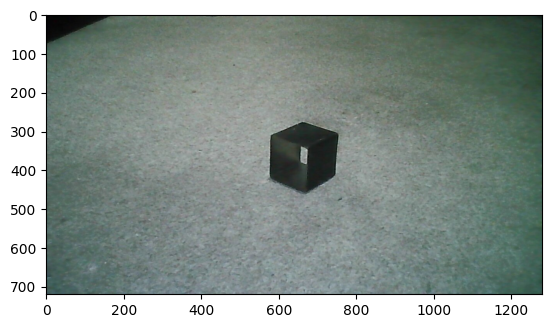

In [1058]:
frame=cv2.imread("dataTest/img6.jpg")
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
print(frame.shape)
plt.imshow(frame)

(500, 1012, 3)


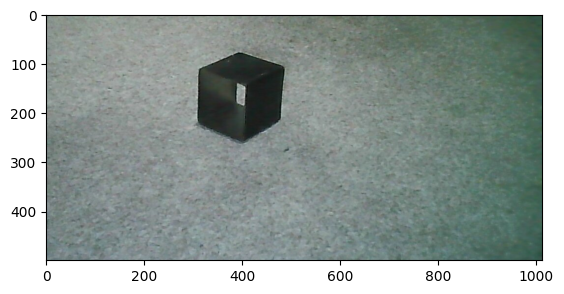

In [1059]:
frame=frame[200:700,268:,:]
cv2.imwrite("dataTest/img6x.jpeg",frame,None) #ultimo parametro estado de compresion ej: cv2.imwrite('imagen_compresion.jpg', image, [cv2.IMWRITE_JPEG_QUALITY, 90])
print(frame.shape)
plt.imshow(frame)

(500, 1012, 3)
(500, 1012, 3)


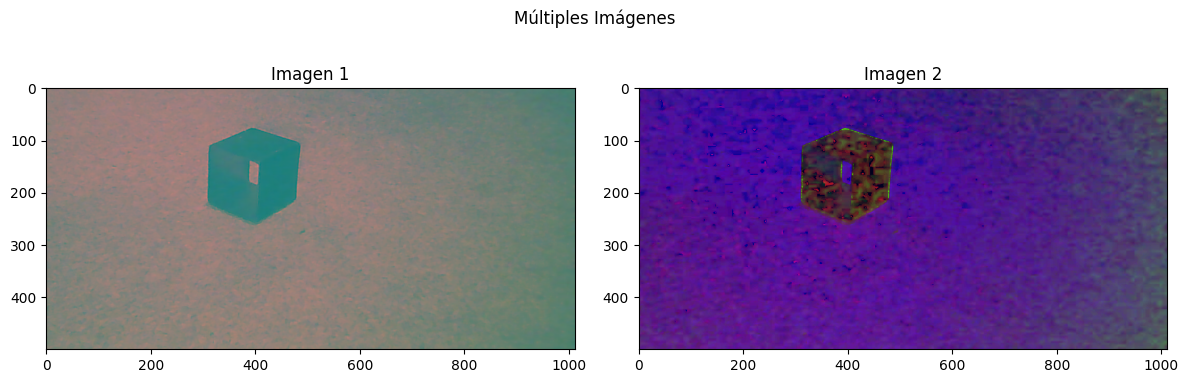

In [1060]:

frame1=cv2.cvtColor(frame,cv2.COLOR_RGB2YUV)
#frame1=frame.copy()
frame2=cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
print(frame1.shape)
print(frame2.shape)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 3 columnas
# Mostrar las imágenes en los subplots individuales
axes[0].imshow(frame1,cmap="gray")
axes[0].set_title('Imagen 1')
axes[1].imshow(frame2,cmap="gray")
axes[1].set_title('Imagen 2')
# Añadir un título general para toda la figura
plt.suptitle('Múltiples Imágenes')
# Ajustar el espaciado entre subplots
plt.tight_layout()
# Mostrar la figura
plt.show()

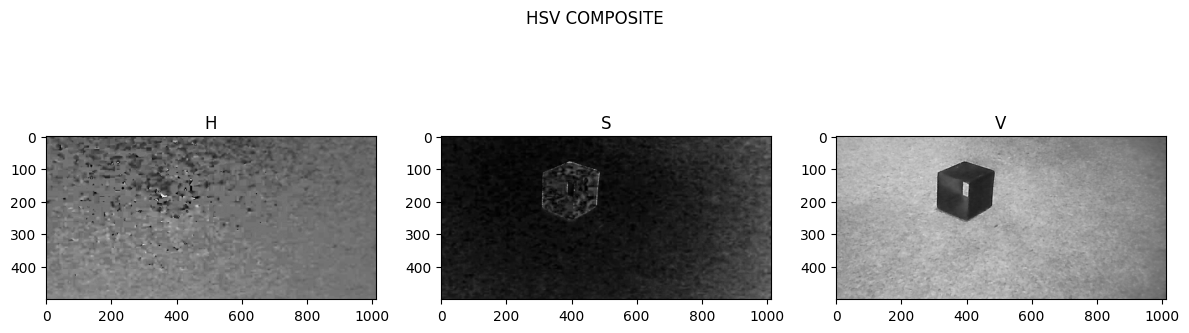

In [1061]:
h, s, v = cv2.split(frame2)


fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(h,cmap="gray")
axes[0].set_title('H')
axes[1].imshow(s,cmap="gray")
axes[1].set_title('S')
axes[2].imshow(v,cmap="gray")
axes[2].set_title('V')
plt.suptitle('HSV COMPOSITE')
plt.tight_layout()
plt.show()


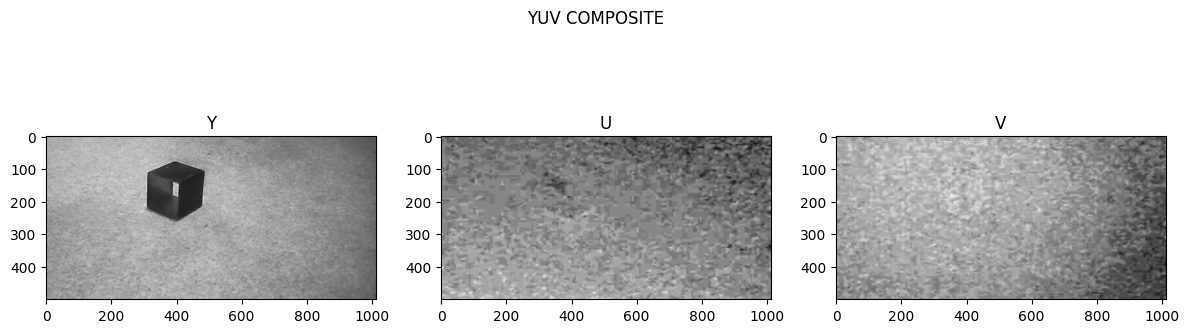

In [1062]:
y, u, v = cv2.split(frame1)


fig, axes = plt.subplots(1, 3, figsize=(12, 4))  
axes[0].imshow(y,cmap="gray")
axes[0].set_title('Y')
axes[1].imshow(u,cmap="gray")
axes[1].set_title('U')
axes[2].imshow(v,cmap="gray")
axes[2].set_title('V')
plt.suptitle('YUV COMPOSITE')
plt.tight_layout()
plt.show()


Probando con HSVFull

<class 'numpy.ndarray'>
(500, 1012, 3)


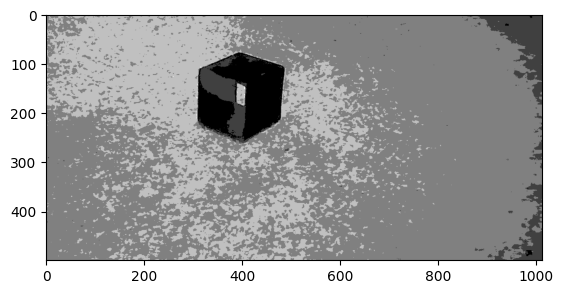

In [1063]:
import numpy as np
HSV=frame2
H, S, V = cv2.split(HSV)
print(type(H))
factor_H = 0 * 255
factor_S = 0.01 * 255
factor_V = 0.02 * 255

# Realizar las multiplicaciones
H = np.clip(H * factor_H / 255, 0, 255).astype(np.uint8)
S = np.clip(S * factor_S / 255, 0, 255).astype(np.uint8)
V = np.clip(V * factor_V / 255, 0, 255).astype(np.uint8)

merged_hsv = cv2.merge((H, S, V))
print(merged_hsv.shape)
merged_hsv=cv2.cvtColor(merged_hsv,cv2.COLOR_HSV2RGB)
merged_hsv=cv2.cvtColor(merged_hsv,cv2.COLOR_RGB2GRAY)
plt.imshow(merged_hsv,cmap="gray")
plt.show()


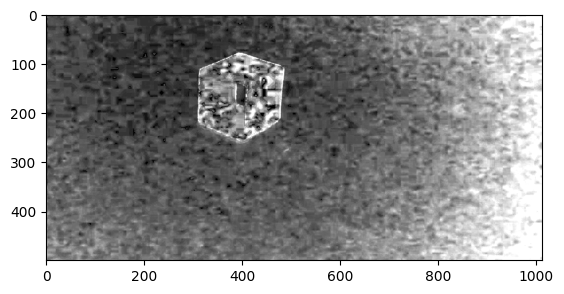

In [1064]:
HSV = frame2
H, S, V = cv2.split(HSV)

# Realiza las operaciones solo en los canales H y S
factor_H = 0.39
factor_S = 2.89
factor_V = 0

H = np.clip(H * factor_H, 0, 255).astype(np.uint8)
S = np.clip(S * factor_S, 0, 255).astype(np.uint8)

V = np.clip(V * factor_V, 0, 255).astype(np.uint8)


# Suma los canales H y S
combined_channel = cv2.add(H, S,V)

# Convierte el canal combinado a una imagen en escala de grises
gray_image = combined_channel

# Muestra la imagen en escala de grises
plt.imshow(gray_image, cmap="gray")
plt.show()

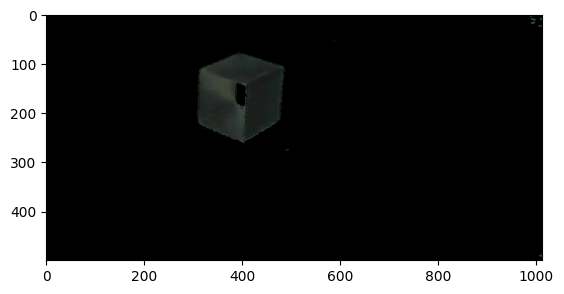

In [1065]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes una imagen en el espacio de color HSV
HSV = frame2

# Extraer la componente V (Valor)
H, S, V = cv2.split(HSV)

# Definir un umbral para la binarización
umbral = 80  # Ajusta este valor según tu preferencia 33

# Binarizar la componente V
mascara_binarizada = (V <= umbral).astype(np.uint8)  # Convertir a 0 (negro) o 1

# Multiplicar la componente V por la máscara binarizada
V_binarizada = V * mascara_binarizada

# Reconstruir la imagen HSV con la componente V binarizada
HSV_binarizado = cv2.merge([H, S, V_binarizada])

# Convertir la imagen binarizada de vuelta a BGR para mostrarla
imagen_binarizada_bgr = cv2.cvtColor(HSV_binarizado, cv2.COLOR_HSV2RGB)

# Mostrar la imagen binarizada
plt.imshow(imagen_binarizada_bgr)
plt.show()


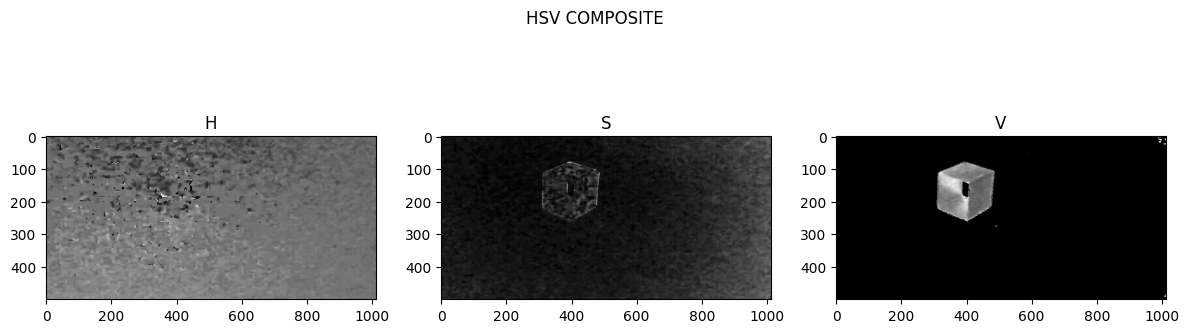

In [1066]:
h, s, v = cv2.split(HSV_binarizado)


fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(h,cmap="gray")
axes[0].set_title('H')
axes[1].imshow(s,cmap="gray")
axes[1].set_title('S')
axes[2].imshow(v,cmap="gray")
axes[2].set_title('V')
plt.suptitle('HSV COMPOSITE')
plt.tight_layout()
plt.show()

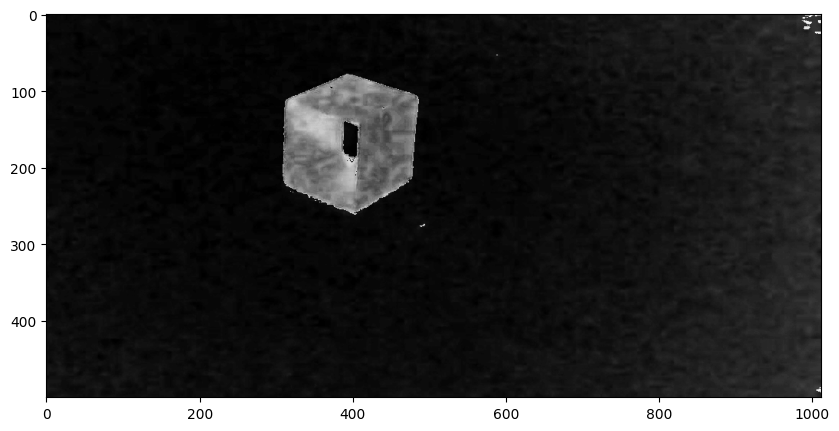

In [1067]:
s2=s
v2=v
factor_s = 0.22#0.045
s2 = np.clip(s2 * factor_s, 0, 255).astype(np.uint8)

suma_SV = cv2.add(s2, v2)

# Crear una imagen en escala de grises a partir de la suma de S y V
imagen_gris = suma_SV

# Mostrar la imagen en escala de grises
plt.figure(figsize=(10, 7)) 
plt.imshow(imagen_gris, cmap="gray")
plt.show()